## <font face='helvetica' color='blue' size=8pt> Tests for Normality</font>

### <font color='blue'> What is a Normality Test? </font>

Assume we have a univariate set of values ( we have a sample from a univariate distribution.) We are checking, based on some calculations with the sample data, if the univariate distribution is a normal one.

Main Idea: We are measuring the nonlinear correlation between the empirical density function of the data vs the theoretical density of a standard normal distribution.

We want to recast this matching procedure onto the backdrop of a linear correlation situation; this means we want to compare the two cumulative distribution functions. To explain, we want the empirical percentiles to correlate linearly with the theoretical percentile of a standard normal distribution.

$$ \large CDF(x):= P(X<x) = \int_{-∞}^{x}f(t)dt$$

The concept is useful in applications where we want to check if a random variable follows a certain distribution.

IMPORTANT: In most cases we standardize the values of the random variable, e.g we compute z-scores.

### <font color='blue'> Linear Correlation </font>

**Visual Example**



<figure>
<center>
<img src='https://i.imgur.com/uXhqecC.png'
width='500px' />
<figcaption>Example of a negative linear correlation</figcaption></center>
</figure>

**Observation**: Based on the scatter plot and the position of the center of mass we infer that the dependent variable (MPG) is expected to drop when the input feature (Weight) increases.

The linear correlation coefficient is defined (Pearson, Karl (20 June 1895). "Notes on regression and inheritance in the case of two parents". Proceedings of the Royal Society of London. 58: 240–242.)

$$\large r: = \frac{1}{n-1}\sum_{i=1}^{n} \left(\frac{x_i - \bar{x}}{s_x}\right)\left(\frac{y_i - \bar{y}}{s_y}\right)$$

Here $\bar{x}$ is the mean of $x$, $\bar{y}$ is the mean of $y$ and, $s_x$ is the standard deviation of $x$ and $s_y$ is the standard deviation of $y.$


If we compute both, the theoretical CDF and the empirical CDF values for 100 percentiles, we would **ideally** want something like this:



<figure>
<center>
<img src='https://i.imgur.com/BW2Spgs.png'
width='500px' />
<figcaption>Example of a very strong positive linear correlation</figcaption></center>
</figure>

### <font color='blue'> The Kolmogorov-Smirnov Test </font>

The test is defined as:

  **H0 (the null hypothesis):**	The data follow a specified distribution.

  **H1 (the alternative hypothesis):** The data do not follow the specified distribution

The main idea is that we focus on how much the empirical cummulative distribution function is different from the theoretical cummulative distribution function, and we may consider:

$$\large \sup_{x} |ECDF(x) - CDF(x)|$$

where $ECDF(x)$ means the emprirical cummulative distribution function:

$$\large ECDF(x):= \frac{1}{n}\sum \mathbb{1}(t)_{t<x}$$

and, $CDF$ stands for the cummulative distribution function:

$$ \large CDF(x):= \int_{-\infty}^{x}f(t)dt.$$  

Here $f$ is the probability density function.

If we order the observations, such as $x_i\leq x_j$ when $i\leq j$, then the test statistic is formally defined by:

$$\large D:=\max_{1\leq i\leq n}\left\{CDF(x_i)-\frac{i-1}{n},\frac{i}{n}-CDF(x_i)\right\}$$

The mathematical notation means that we add $1$ for each $t$ less than $x$ and $n$ represents the sample size.

### <font color='blue'> The Anderson-Darling Test </font>

The test is defined as:

  **H0 (the null hypothesis)**:	The data follow a specified distribution.

  **H1 (the alternative hypothesis)**: The data do not follow the specified distribution

  The test statistic is defined as:

  $$\large AD := -n - \sum_{i=1}^{n} \frac{2i-1}{n}\left[\ln(CDF(x_i))+\ln(1-CDF(x_{n+1-i})\right] $$

The critical values for the Anderson-Darling test are dependent on the specific distribution that is being tested.

## <font color='blue'> Coding Applications </font>
---

In [2]:
import os
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/Data Sets')

else:
  print('Running locally')
  os.chdir('../Data Sets')

Running locally


In [3]:
# Setup Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
# this is for displaying plots with high resolution
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
# to keep focus on what matters we can supress the warnings from functions
import warnings
warnings.simplefilter(action='ignore')
# import seaborn - this is good for plotting histograms and probability density functions
import seaborn as sns
sns.set(color_codes=True)

from scipy import stats # helps with many distribution functions
from scipy.stats import norm, uniform, beta, gamma
import statsmodels.api as sm
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [4]:
# we consider the cumulative distribution function
CDF = norm.cdf

In [5]:
n = 500
pop = norm.rvs(size=n,loc=-5, scale = 2.5, random_state=1234)# here loc is the mean and scale is the standard deviation

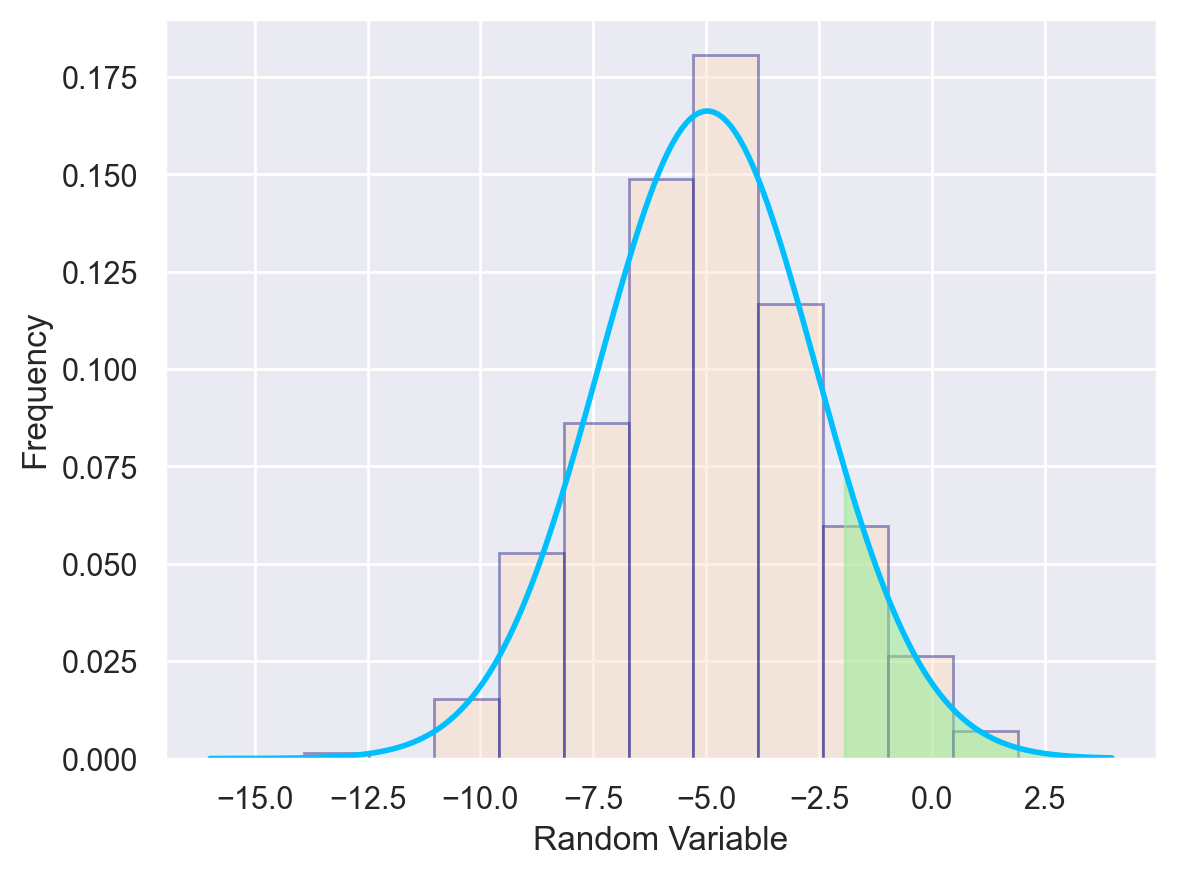

In [19]:
ax = sns.distplot(pop,
                  bins=11,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'PeachPuff','ec':'Navy'},
                  fit=stats.norm,
                  fit_kws={"color":'deepskyblue','lw':2})
ax.set(xlabel='Random Variable', ylabel='Frequency')
l = ax.lines[0]
x = l.get_xydata()[:,0]
y = l.get_xydata()[:,1]
ax.fill_between(x,y, where=(-2<=x) & (x <= 6), color='lightgreen',alpha=0.5)
plt.show()

In [8]:
def zscore(x):
  return (x-np.mean(x))/np.std(x)

In [20]:
# We generate the empirical percentiles
# we need first to standardize the sample values
xscaled = zscore(pop)

In [10]:
# we need to generate equally spaced quantities or percentages
p = np.linspace(0,100,101)

In [21]:
# we need empirical percentiles
px = np.percentile(xscaled,p)

In [12]:
(px[3]>xscaled).sum()/len(xscaled)

0.03

<font color='red' size=5px> Critical Thinking: We plug in the empirical percentiles into the normal CDF and expect to get an output that linearly correlates perfectly with the percentages.</font>

In [22]:
# empirical percentages
emp = CDF(px)

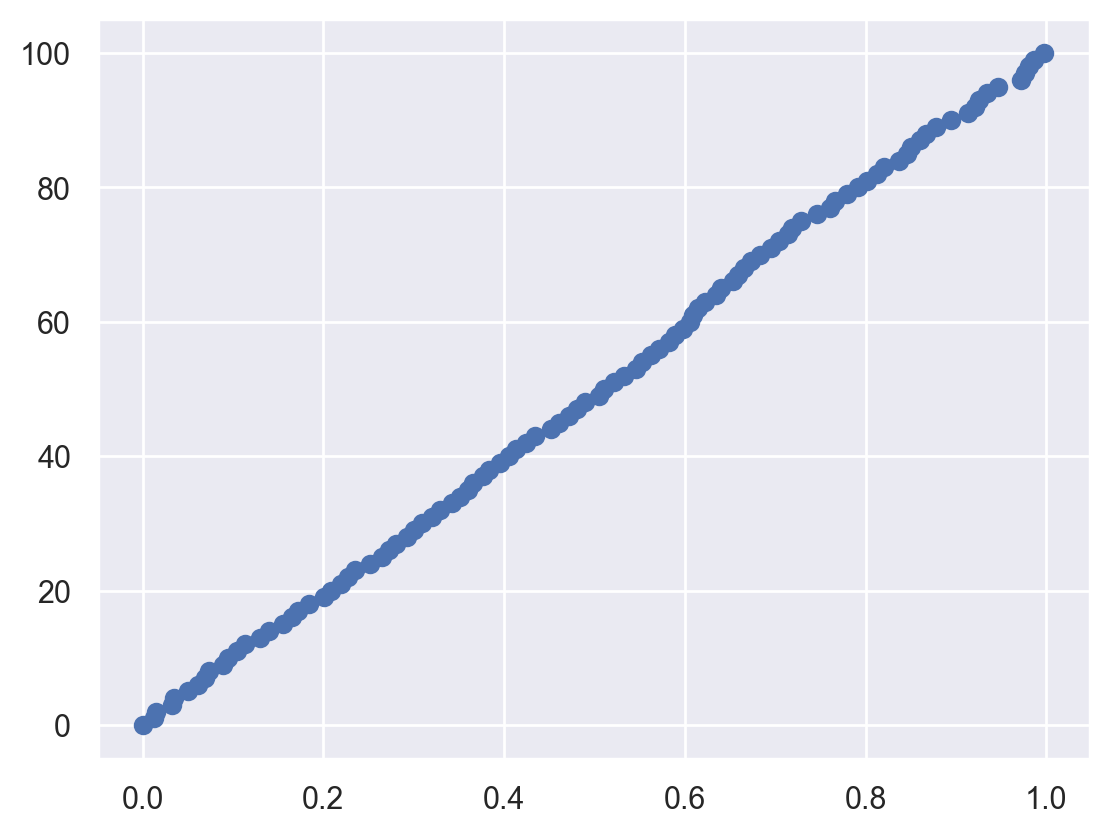

In [23]:
# we can do a scatter plot
plt.scatter(emp,p)
plt.show()

In [22]:
# if we want, we can apply the Pearson correlation coefficient calculation
np.corrcoef(px,p)[0,1]

0.9591044252421194

In [ ]:
n = 120
x = beta.rvs(size=n,a=1.7,b=2.9,loc=-5, scale = 20, random_state=123)

In [ ]:
x

In [ ]:
# how to compute any percentile of a given data
np.percentile(x,34)

1.3539515721040731

In [ ]:
# let us verify this
sum(x<1.35395)/300

0.34

In [ ]:
x = [-3.189343, -2.733437, -4.596153, -0.427008, 1.407113, 4.466470, -3.036996, 10.072941, 12.068139, 5.917741, -1.827329, -0.793940, 8.286873, 0.227712, 10.099303, 0.842727, -2.249526, 4.611352, -2.629408, 9.644136, 0.711129, 8.591006, 4.281074, 8.228539, 10.149950, -1.394586, 4.622470, 4.699378, 0.963404, -2.548536, 8.704853, 1.408794, -2.637375, -0.847407, 7.293997, -3.005527, -0.332669, -1.781923, 1.948523, 6.538402, 8.124666, -4.257477, -0.135509, -0.334975, -1.547427, 4.321249, 0.630962, 8.257236, -0.640466, 2.131254, -1.961750, 1.301489, 1.208537, 7.114471, 4.643276, 2.489530, -2.881531, 4.152475, -0.936748, -1.623379, 10.163800, -2.641092, 0.814816, 4.589079, 6.330670, 2.266911, 4.636184, -3.442398, 5.111976, 3.833481, 2.389831, 3.279079, 3.496974, 0.637392, -1.633581, 10.863877, -0.024615, -2.676299, -4.245284, -2.854003, -4.367380, 0.503971, -1.678988, -2.008990, 4.202653, 7.187365, 3.022774, 2.832137, 5.329067, 0.116806, -2.020274, 2.374142, 11.429609, 6.547544, 1.332430, 1.196220, -1.805283, -3.686906, -1.006468, -1.048804, 10.564067, 2.941392, 5.625446, -0.674923, 8.296346, 0.341765, 5.229612, 2.185211, 0.223214, 0.672880, 8.836980, -0.344472, 0.039022, -0.061800, 4.991399, 9.692458, -2.204194, -0.629013, 6.451068, 8.611125]

In [ ]:
def zscore(x):
  return (x-np.mean(x))/np.std(x)

In [ ]:
zscore(x)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()
scale.fit_transform(x.reshape(-1,1))

### What is a percentile?

Answer: it represents a cutoff value in the metric of the variable such that below the cutoff we have the prescribed percentage of the whole data.

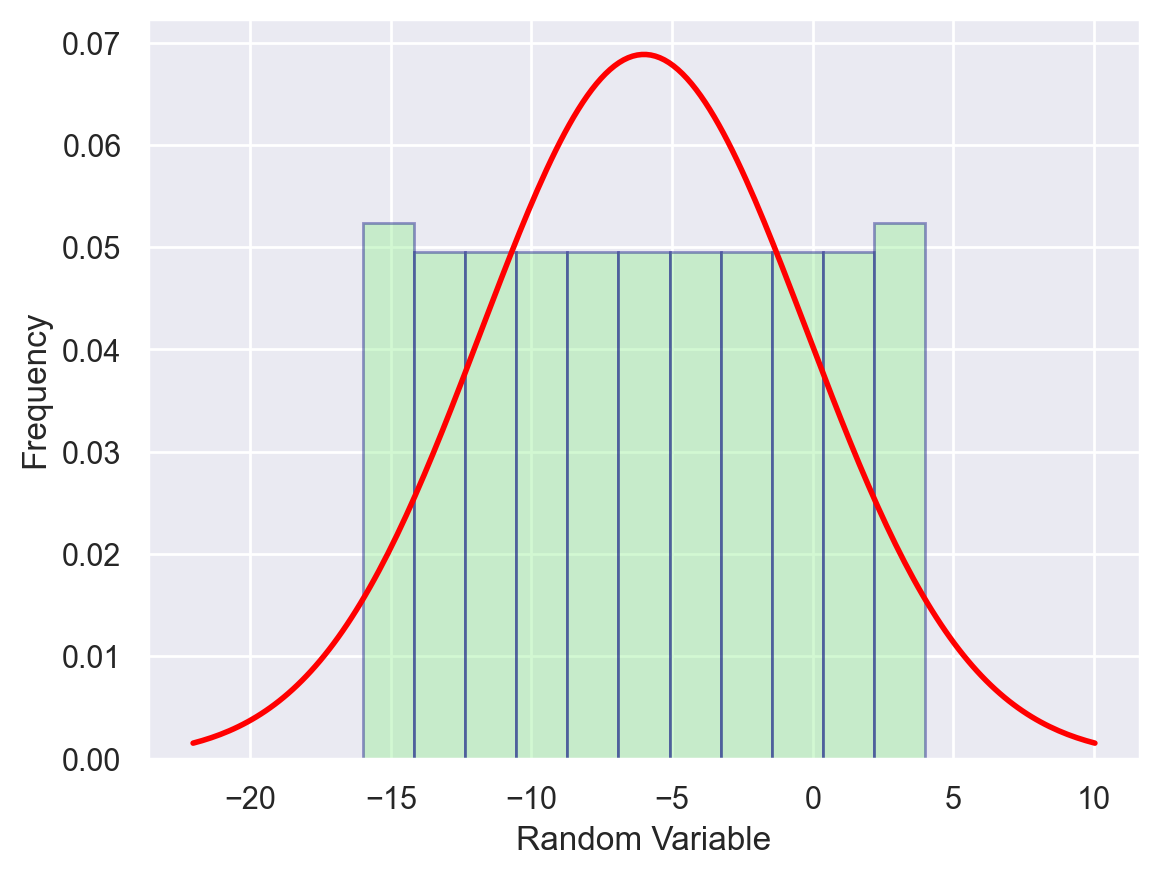

In [27]:
ax1 = sns.distplot(x,
                  bins=11,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightgreen','ec':'navy'},
                  fit=stats.norm,
                  fit_kws={"color":'red','lw':2})
ax1.set(xlabel='Random Variable', ylabel='Frequency')
plt.show()

In [ ]:
n=100
p = np.array([(i/n) for i in range(n)])

p

array([0.000000, 0.010000, 0.020000, 0.030000, 0.040000, 0.050000,
       0.060000, 0.070000, 0.080000, 0.090000, 0.100000, 0.110000,
       0.120000, 0.130000, 0.140000, 0.150000, 0.160000, 0.170000,
       0.180000, 0.190000, 0.200000, 0.210000, 0.220000, 0.230000,
       0.240000, 0.250000, 0.260000, 0.270000, 0.280000, 0.290000,
       0.300000, 0.310000, 0.320000, 0.330000, 0.340000, 0.350000,
       0.360000, 0.370000, 0.380000, 0.390000, 0.400000, 0.410000,
       0.420000, 0.430000, 0.440000, 0.450000, 0.460000, 0.470000,
       0.480000, 0.490000, 0.500000, 0.510000, 0.520000, 0.530000,
       0.540000, 0.550000, 0.560000, 0.570000, 0.580000, 0.590000,
       0.600000, 0.610000, 0.620000, 0.630000, 0.640000, 0.650000,
       0.660000, 0.670000, 0.680000, 0.690000, 0.700000, 0.710000,
       0.720000, 0.730000, 0.740000, 0.750000, 0.760000, 0.770000,
       0.780000, 0.790000, 0.800000, 0.810000, 0.820000, 0.830000,
       0.840000, 0.850000, 0.860000, 0.870000, 0.880000, 0.890

In [ ]:
p = np.arange(0,1,0.01)

In [ ]:
p

In [ ]:
p = np.arange(0,1,0.01)

In [ ]:
# how to compute empirical percentiles
np.percentile(pop,32)

5.90253764114055

In [ ]:
# we can use the Standard Scaler or write our own function to compute z-scores
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [ ]:
# important: do not forget to scale x into z-scores
xscaled = scale.fit_transform(pop.reshape(-1,1))

In [32]:
# we have to compute the empirical percentiles of x and then apply CDF to them
px = []
for i in range(101):
  px.append(np.percentile(xscaled,i))

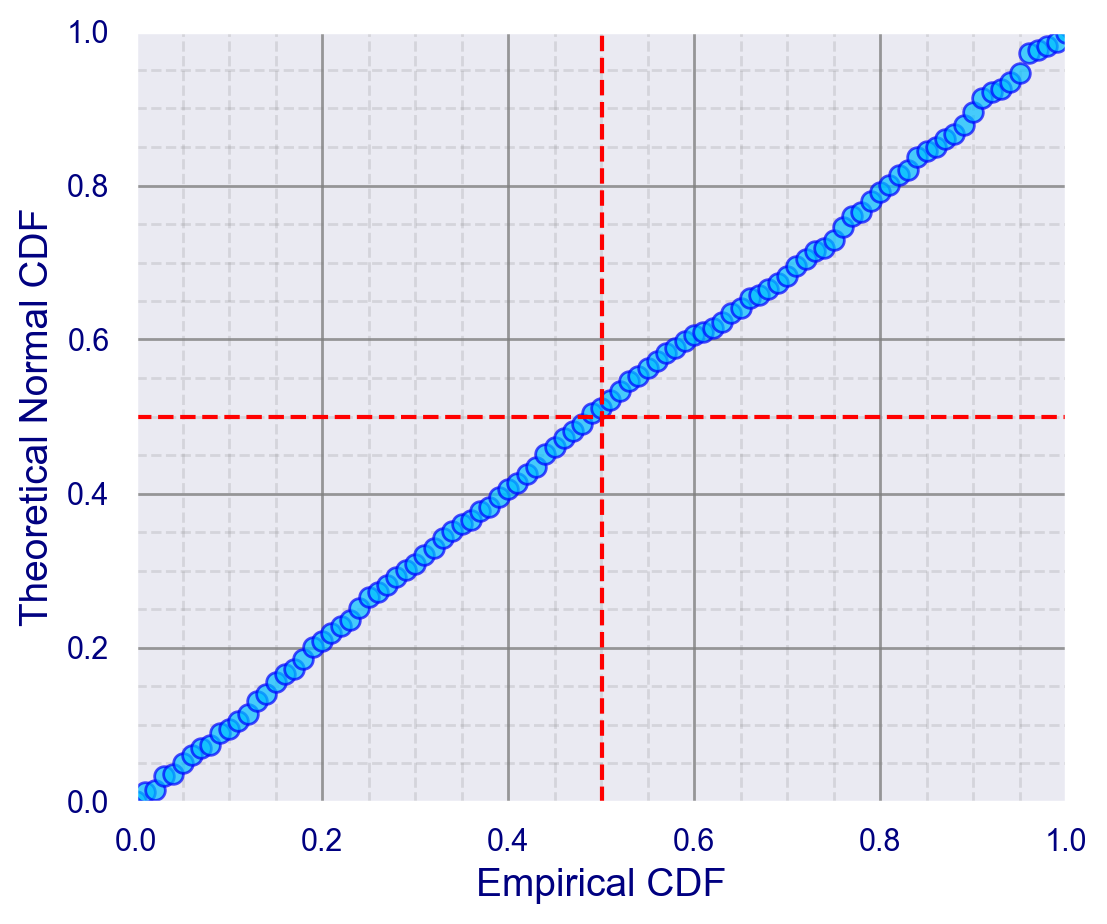

In [38]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(p/100,CDF(px),color='deepskyblue',s=50,ec='blue',alpha=0.7)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('Empirical CDF',fontsize=14,color='navy')
ax.set_ylabel('Theoretical Normal CDF',fontsize=14,color='navy')
ax.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.axvline(x=np.mean(CDF(px)), color='red',linestyle='dashed')
plt.axhline(y=np.mean(p/100), color='red',linestyle='dashed')
ax.tick_params(axis='x', colors='navy')
ax.tick_params(axis='y', colors='navy')
ax.minorticks_on()
plt.savefig('lin_corr_CDFs.png',dpi=300)
plt.show()

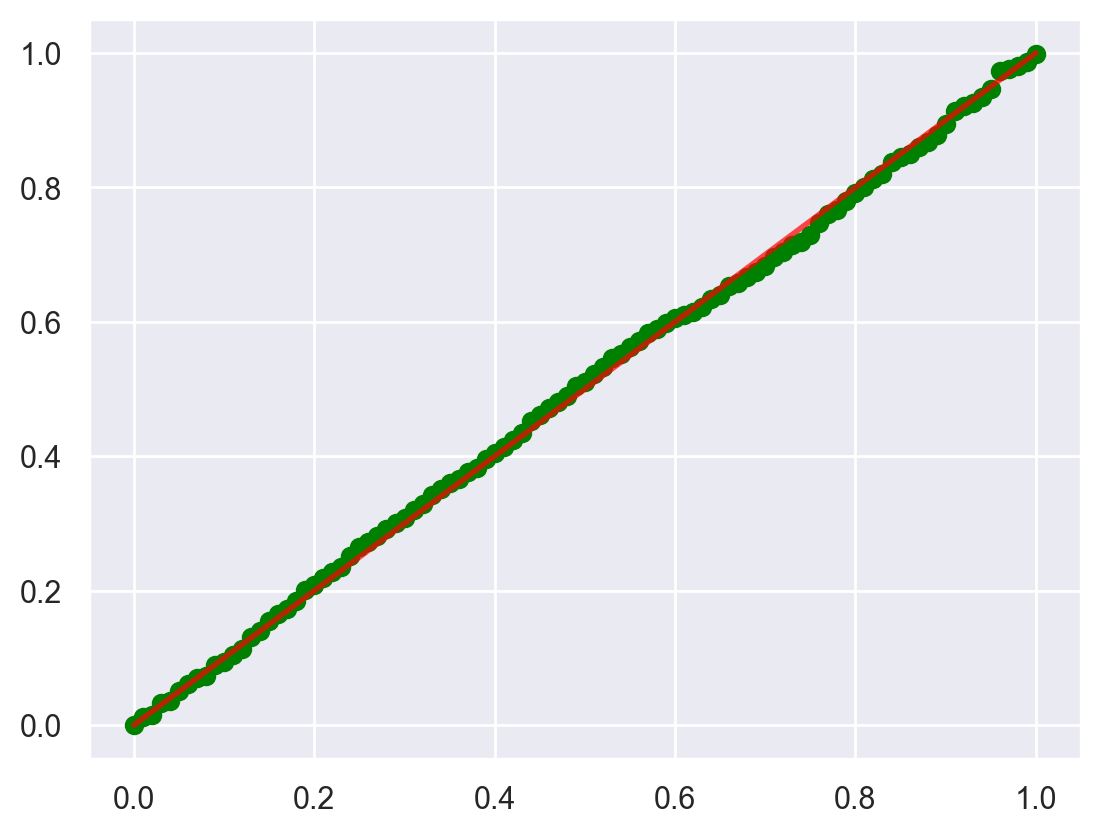

In [34]:
plt.scatter(p/100,CDF(px),color='green')
plt.plot([0,1],[0,1],color='red',lw=2,alpha=0.7)
plt.show()

In [25]:
# we create 100 percentiles of the empirical variable
px = []
for i in range(100):
  px.append(np.percentile(xscaled,i))

In [ ]:
px

In [ ]:
plt.scatter(p,CDF(px),color='green')
plt.plot([0,1],[0,1],color='red',lw=2,alpha=0.7)
plt.show()

In [ ]:
zscore(x)

array([-1.274847, -1.168312, -1.603588, -0.629350, -0.200755, 0.514150,
       -1.239247, 1.824260, 2.290495, 0.853280, -0.956574, -0.715094,
       1.406895, -0.476356, 1.830421, -0.332640, -1.055232, 0.548006,
       -1.144003, 1.724058, -0.363392, 1.477964, 0.470827, 1.393264,
       1.842256, -0.855451, 0.550604, 0.568575, -0.304440, -1.125105,
       1.504568, -0.200363, -1.145864, -0.727588, 1.174882, -1.231893,
       -0.607305, -0.945964, -0.074240, 0.998315, 1.368991, -1.524447,
       -0.561233, -0.607843, -0.891167, 0.480215, -0.382125, 1.399970,
       -0.679230, -0.031539, -0.987985, -0.225437, -0.247158, 1.132930,
       0.555466, 0.052182, -1.202918, 0.440776, -0.748465, -0.908915,
       1.845492, -1.146733, -0.339162, 0.542801, 0.949773, 0.000161,
       0.553808, -1.333981, 0.664991, 0.366234, 0.028885, 0.236682,
       0.287600, -0.380622, -0.911299, 2.009085, -0.535319, -1.154960,
       -1.521598, -1.196486, -1.550129, -0.411800, -0.921910, -0.999024,
       0.4525

In [24]:
from scipy.stats import kstest

In [25]:
# we want to use the provided KS test from scipy
kstest(xscaled,'norm')

KstestResult(statistic=0.022860143567024593, pvalue=0.950965163070365, statistic_location=0.5802881946439121, statistic_sign=1)

In [ ]:
def test_ks(x):
  n = len(x)
  x_sorted = np.sort(x)
  d = 0.0
  for i in range(n):
    if d < np.max([CDF(x_sorted[i])-i/n,(i+1)/n-CDF(x_sorted[i])]):
      d = np.max([CDF(x_sorted[i])-i/n,(i+1)/n-CDF(x_sorted[i])])
  return d

In [ ]:
test_ks(zscore(x))

0.033676568529045714

## Example: **Sample from Non-Normal Distributions**

In [26]:
# let's make a sample from a beta distribution
sample = beta.rvs(a=1.4,b=1.9,loc=3,scale=2,size=300)

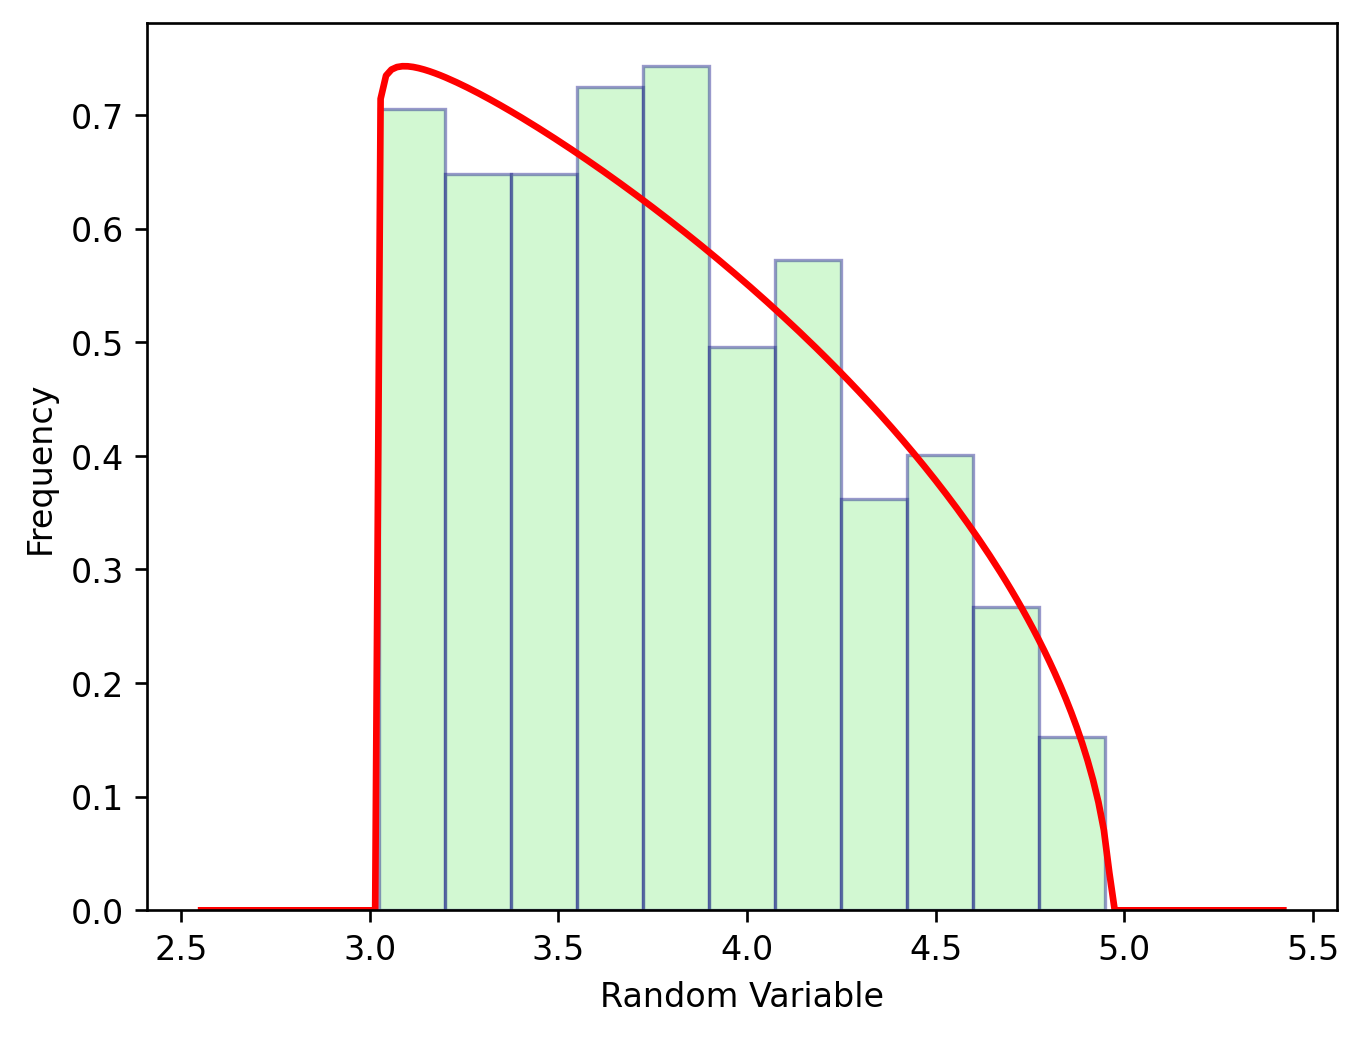

In [27]:
ax1 = sns.distplot(sample,
                  bins=11,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightgreen','ec':'navy'},
                  fit=stats.beta,
                  fit_kws={"color":'red','lw':2})
ax1.set(xlabel='Random Variable', ylabel='Frequency')
plt.show()

In [28]:
# we scale the empirical data
xscaled = zscore(sample)

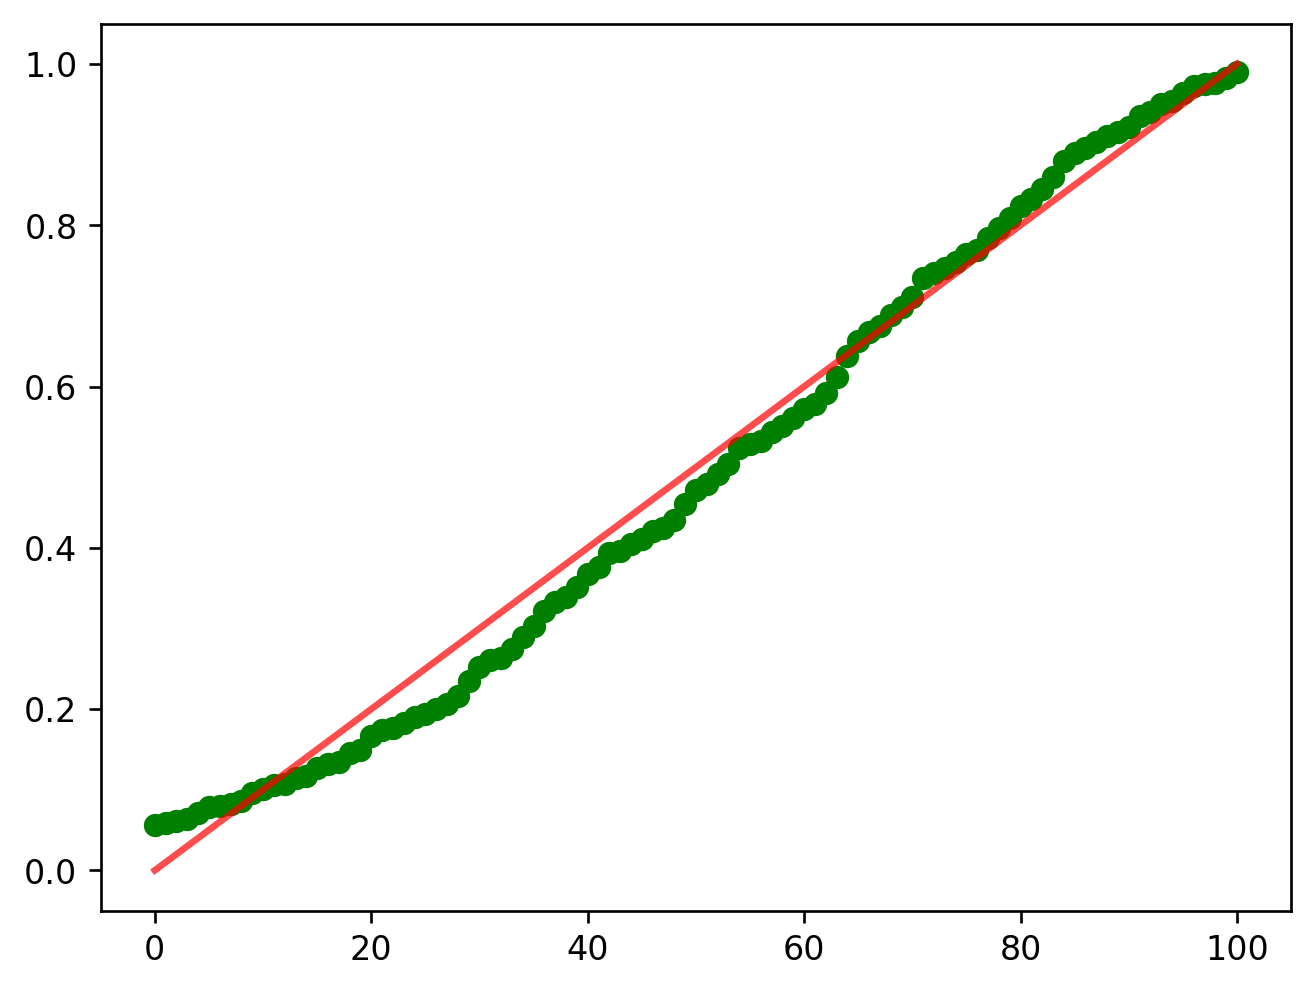

In [30]:
plt.scatter(p,CDF(np.percentile(xscaled,p)),color='green')
plt.plot([0,100],[0,1],color='red',lw=2,alpha=0.7)
plt.show()

In [31]:
kstest(xscaled,'norm')

KstestResult(statistic=0.07189204048840503, pvalue=0.0856691702001311, statistic_location=-0.8130037310238237, statistic_sign=1)

In [ ]:
# here in the variable dist we collect the mean and the standard deviation
dist = getattr(stats, 'norm')
params = dist.fit(x)
params

(-4.992426488419786, 2.1047652528510574)

In [ ]:
# we can use the available function in SciPy
stats.kstest(zscore(x),'norm') # here we fail to reject the Null hypthesis

KstestResult(statistic=0.11273479372060602, pvalue=0.08755487091225611)

In [ ]:
# this shows how we can generate a table of critical values for the K-S test

from scipy.stats import ksone

def ks_critical_value(n_trials, alpha):
    return ksone.ppf(1-alpha/2, n_trials)

trials = range(1, 121)
alphas = [0.1, 0.05, 0.02, 0.01]

# Print table headers
print('{:<6}|{:<6} Level of significance, alpha'.format(' ', ' '))
print('{:<6}|{:>8} {:>8} {:>8} {:>8}'.format(*['Trials'] + alphas))
print('-' * 42)
# Print critical values for each n_trials x alpha combination
for t in trials:
    print('{:6d}|{:>8.5f} {:>8.5f} {:>8.5f} {:>8.5f}'
          .format(*[t] + [ks_critical_value(t, a) for a in alphas]))
    if t % 10 == 0:
        print()

In [ ]:
ks_critical_value(1000,0.1)

0.038533841268045536

In [32]:
stats.anderson(xscaled,'norm')

AndersonResult(statistic=2.391696500082105, critical_values=array([0.569000, 0.648000, 0.777000, 0.906000, 1.078000]), significance_level=array([15.000000, 10.000000, 5.000000, 2.500000, 1.000000]), fit_result=  params: FitParams(loc=-2.0280073916486193e-16, scale=1.0016708449412668)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

So we fail to reject the null hypothesis (we can say that the normality assumption is not violated).

## Quantile-Quantile Plots

In this case we want the scatter plot to be as close as possible to the line that passes trhough origin and has slope 1.

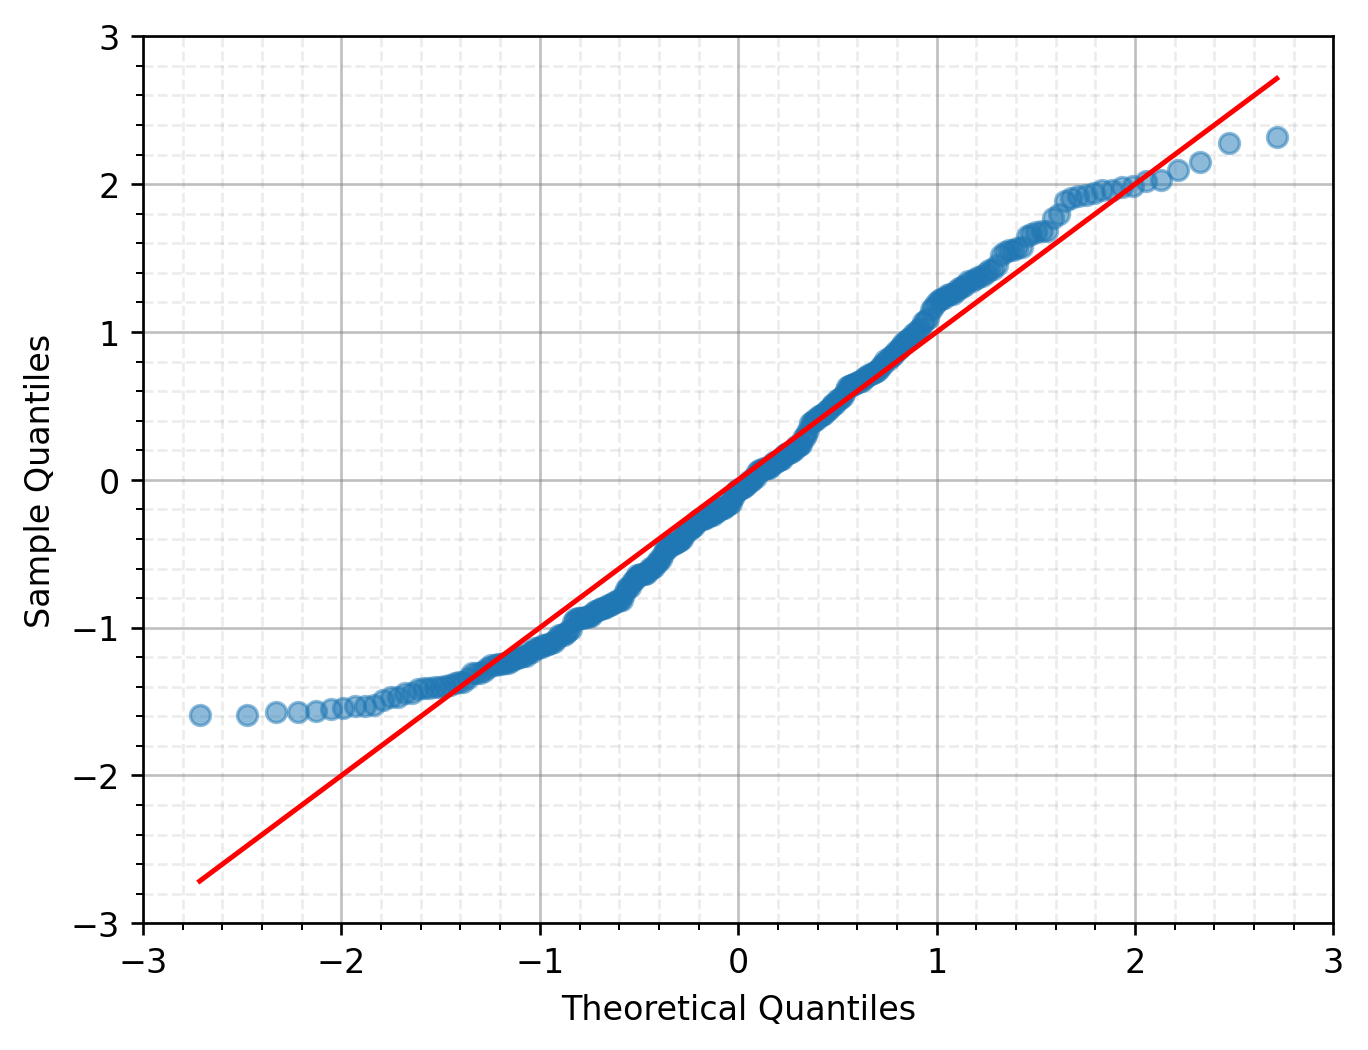

In [34]:
sm.qqplot(xscaled, loc = 0, scale = 1, line='s',alpha=0.5)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.grid(which='major', color ='grey', linestyle='-', alpha=0.5)
plt.grid(which='minor', color ='grey', linestyle='--', alpha=0.15)
plt.minorticks_on()
plt.show()

## Application to Residuals

In [36]:
import pandas as pd

In [37]:
data = pd.read_csv('drive/MyDrive/Data Sets/cars.csv')

In [41]:
# let's assume we want to predict the mileage by using the rest of the attributes
y = data.MPG.values

In [42]:
data

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449
...,...,...,...,...
387,27.0,4,140.0,2790
388,44.0,4,97.0,2130
389,32.0,4,135.0,2295
390,28.0,4,120.0,2625


In [43]:
x = data.drop(['MPG'],axis=1).values

In [44]:
# we need to apply a linear regression
from sklearn.linear_model import LinearRegression

In [47]:
lm = LinearRegression(fit_intercept=True)

In [48]:
lm.fit(x,y)

LinearRegression()

In [49]:
residuals = y - lm.predict(x)

We want to know if the residuals are normally distributed.

In [50]:
xscaled = zscore(residuals)

In [51]:
kstest(xscaled,'norm')

KstestResult(statistic=0.0683255996564156, pvalue=0.04908451807390657, statistic_location=0.3133718898827476, statistic_sign=1)

In [53]:
stats.anderson(xscaled,'norm')

AndersonResult(statistic=2.7193947207807696, critical_values=array([0.570000, 0.649000, 0.779000, 0.909000, 1.081000]), significance_level=array([15.000000, 10.000000, 5.000000, 2.500000, 1.000000]), fit_result=  params: FitParams(loc=0.0, scale=1.001277955793012)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

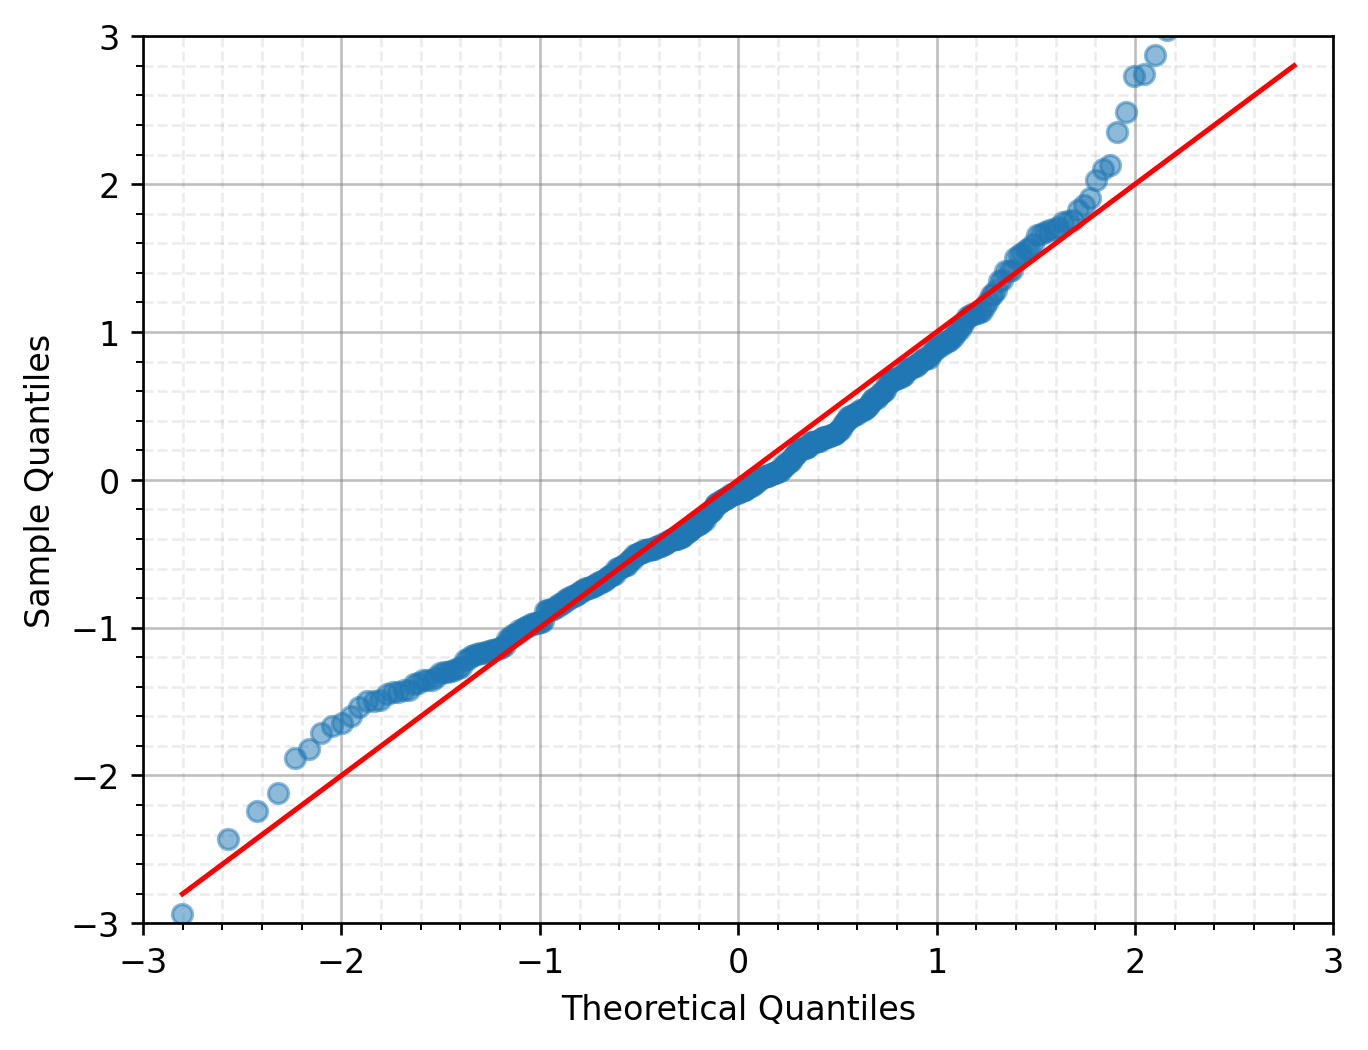

In [55]:
sm.qqplot(xscaled, loc = 0, scale = 1, line='s',alpha=0.5)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.grid(which='major', color ='grey', linestyle='-', alpha=0.5)
plt.grid(which='minor', color ='grey', linestyle='--', alpha=0.15)
plt.minorticks_on()
plt.show()

In [ ]:
# how can we compute percentiles in Python?
np.percentile(scale.fit_transform(x.reshape(-1,1)),15)

-1.0664086886273396

In [ ]:
# make your own Q-Q plot function

array([0.000000, 0.010000, 0.020000, 0.030000, 0.040000, 0.050000,
       0.060000, 0.070000, 0.080000, 0.090000, 0.100000, 0.110000,
       0.120000, 0.130000, 0.140000, 0.150000, 0.160000, 0.170000,
       0.180000, 0.190000, 0.200000, 0.210000, 0.220000, 0.230000,
       0.240000, 0.250000, 0.260000, 0.270000, 0.280000, 0.290000,
       0.300000, 0.310000, 0.320000, 0.330000, 0.340000, 0.350000,
       0.360000, 0.370000, 0.380000, 0.390000, 0.400000, 0.410000,
       0.420000, 0.430000, 0.440000, 0.450000, 0.460000, 0.470000,
       0.480000, 0.490000, 0.500000, 0.510000, 0.520000, 0.530000,
       0.540000, 0.550000, 0.560000, 0.570000, 0.580000, 0.590000,
       0.600000, 0.610000, 0.620000, 0.630000, 0.640000, 0.650000,
       0.660000, 0.670000, 0.680000, 0.690000, 0.700000, 0.710000,
       0.720000, 0.730000, 0.740000, 0.750000, 0.760000, 0.770000,
       0.780000, 0.790000, 0.800000, 0.810000, 0.820000, 0.830000,
       0.840000, 0.850000, 0.860000, 0.870000, 0.880000, 0.890